<h1>Ham vs Spam</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import spacy
import re

from wordcloud import WordCloud, STOPWORDS 

In [2]:
df=pd.read_csv(r"spam.csv",encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
print('% of missing values in the Unnamed 2,3 and 4 columns\n')
print(df['Unnamed: 2'].isna().sum()/df.shape[0])
print(df['Unnamed: 3'].isna().sum()/df.shape[0])
print(df['Unnamed: 4'].isna().sum()/df.shape[0])

% of missing values in the Unnamed 2,3 and 4 columns

0.9910265613783201
0.9978463747307968
0.9989231873653984


In [6]:
#removing unnecesary columns and renaming the columns of text and class label
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.rename(columns={'v1':'label','v2':'data'},inplace=True)
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [7]:
df.head()

,label,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   int64 
 1   data    5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [9]:
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

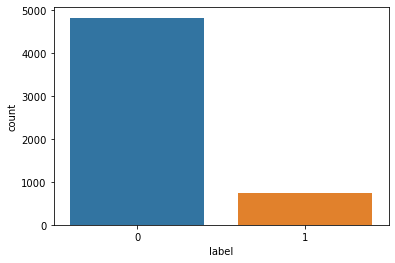

In [10]:
sns.countplot(df['label'])

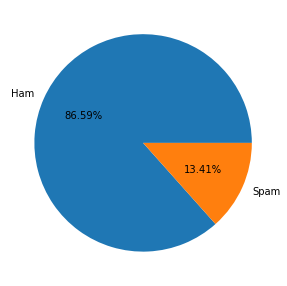

In [11]:
freq = df['label'].value_counts().tolist()
label = ['Ham','Spam']
plt.figure(figsize=(5,5))
plt.pie(freq, labels = label,autopct='%1.2f%%')
plt.show()

In [12]:
print('No of duplicate rows',df.duplicated().sum())

No of duplicate rows 403


In [13]:
#removing duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5169 non-null   int64 
 1   data    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [15]:
df.isna().sum()

label    0
data     0
dtype: int64

In [16]:
df.to_csv('Hamvsspam',index=False)

In [17]:
df.columns

Index(['label', 'data'], dtype='object')

<h6> Findings:</h6>
<p>Data contains 5572 rows and two column first is text mssg and second is class label forthat text mssg</p> 
<p>Data is highly imbalance with only 13.4 % data contains spam label and rest 86.6 % are of ham label</p>
<p>There are 403 duplcate values in data and data has nomissing values </p> 

<h6> Solutions for imbalance data:</h6>
<p>1. Can do upsampling (results in overfitting) or downsampling (results in lost of importatnt data) </p> 
<p>2. Can use smote to create synthetic data points for spam class (not very suitable for text data but can work sometimes)</p>
<p>3. Can use models with giving equal weight to both the classes</p> 

In [18]:
nlp = spacy.load('en_core_web_sm')

In [19]:
#removing non alpha numeric characters
def remove_special_characters(text):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    text=re.sub(r'\s+',' ',text)
    return text

In [20]:
df['data']=df['data'].apply(remove_special_characters)

In [21]:
#performing lemmitization with spacy
def process(sent):
    d = nlp(sent)
    tokens=[]
    
    for i in d:
        if i.lemma_ != '-PRON-':
            tokens.append(i.lemma_)

    tokens = ' '.join(tokens)
    return tokens

In [22]:
df['data']=df['data'].apply(process)

In [23]:
df.head()

,label,data
0,0,go until jurong point crazy Available only in ...
1,0,ok lar Joking wif u oni
2,1,free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,nah do not think go to usf live around here th...


In [24]:
def cloud_plot(df,col,stopwords):
    text = " ".join(review for review in df[col].astype(str))
    print('There are total {} words in your vocab'.format(len(text)))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

def word_cloud(df,col,label,stopwords=set(STOPWORDS)):
    df[col] = df[col].str.lower()
    print('Word Cloud for entire data:-')
    cloud_plot(df,col,stopwords)
    labels = df[label].unique().tolist()
    for i in labels:
        print('\n*************************************************')
        print('Word Cloud for class label = ',i)
        data = df[df[label]==i]
        cloud_plot(data,col,stopwords)    

Word Cloud for entire data:-
There are total 355063 words in your vocab


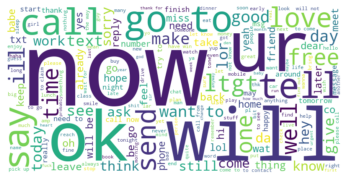


*************************************************
Word Cloud for class label =  0
There are total 273444 words in your vocab


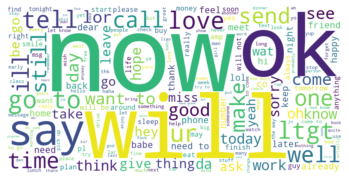


*************************************************
Word Cloud for class label =  1
There are total 81618 words in your vocab


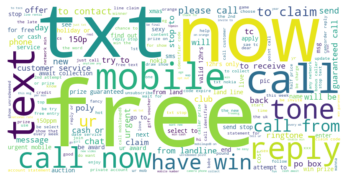

In [25]:
col = 'data'
label = 'label'
word_cloud(df,col,label)

In [26]:
df.to_csv('Hamvsspam.csv',index=False)

We can also create new columns like number of wrong spelled words since spam messages are moe likely to contains spelling mistakes also we can count the length of each word in message as new column to see if there is relationship between 